<a href="https://colab.research.google.com/github/irissun9602/Mouse-Dynamics/blob/main/Login_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import os
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

file_path = f'/content/drive/MyDrive/Colab Notebooks/rba-dataset40.csv'

login_data = pd.read_csv(file_path)

# 결과 출력
print(login_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      index Login Timestamp       User ID  Round-Trip Time [ms]  \
0    482071         51:52.0  2.670000e+18                   NaN   
1    482072         51:53.8  5.810000e+18                   NaN   
2    482073         51:54.1  4.660000e+18                   NaN   
3    482074         51:54.6 -4.320000e+18                   NaN   
4    482075         51:56.9 -8.310000e+18                   NaN   
..      ...             ...           ...                   ...   
374  482445         01:48.4  5.520000e+18                   NaN   
375  482446         01:48.7  5.620000e+18                   NaN   
376  482447         01:49.9 -4.320000e+18                   NaN   
377  482448         01:50.4 -4.320000e+18                   NaN   
378  482449         01:50.6 -4.320000e+18                   NaN   

          IP Address Country             Region                 Ci

In [ ]:
login_data['User ID'] = login_data['User ID'].astype(int)

In [ ]:
login_data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482071,51:52.0,2670000000000000000,NaN,109.247.53.155,NO,Agder,Byglandsfjord,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile 81.0.4044,iOS 11.2.6,mobile,True,False,False
1,482072,51:53.8,5810000000000000000,NaN,209.236.125.125,US,-,-,393398,Mozilla/5.0 (Linux; U; Android 2.2) AppleWebK...,Chrome Mobile 63.0.3239,Android 2.2,mobile,True,True,False
2,482073,51:54.1,4660000000000000000,NaN,213.205.109.136,FR,-,-,43646,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,True,False,False
3,482074,51:54.6,-4320000000000000000,NaN,199.26.84.38,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 81.0.4044,Android 4.1,mobile,False,False,False
4,482075,51:56.9,-8310000000000000000,NaN,10.0.186.103,GB,England,Charlton Horethorne,29550,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Edge 81.0.416,Mac OS X 10.14.6,desktop,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,482445,01:48.4,5520000000000000000,NaN,84.234.240.165,NO,Agder,Faervik,29695,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 79.0.3945.192.203,Mac OS X 10.14.6,desktop,True,False,False
375,482446,01:48.7,5620000000000000000,NaN,199.26.84.139,US,-,-,393398,Mozilla/5.0 (Mobile; Windows Phone 8.1; Andro...,Chrome Mobile 81.0.4044.2917.2918,Windows Phone 8.1,mobile,False,False,False
376,482447,01:49.9,-4320000000000000000,NaN,212.18.220.169,DE,Baden-Württemberg,Sindelfingen,8937,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile WebView 85.0.4183,iOS 11.2.6,mobile,False,False,False
377,482448,01:50.4,-4320000000000000000,NaN,10.0.80.35,PL,Lesser Poland,Greboszow,205727,Mozilla/5.0 (Mobile; LYF/F220B/LYF-F220B-003-...,Chrome Mobile WebView 85.0.4183,KaiOS 2.5,mobile,False,False,False


In [ ]:
# 'User ID' 열의 앞자리 3개를 가져오고 절댓값을 씌워주는 함수
def process_user_id(user_id):
    return abs(int(str(user_id)[:3]))

# 'User ID' 열에 함수를 적용하여 처리
login_data['User ID'] = login_data['User ID'].apply(lambda x: process_user_id(x))

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

login_data_copy = login_data.copy()

# 'Login Timestamp' 열을 Label Encoding
login_data_copy['Login Timestamp'] = label_encoder.fit_transform(login_data_copy['Login Timestamp'])

# 'IP Address' 열을 Label Encoding
login_data_copy['IP Address'] = label_encoder.fit_transform(login_data_copy['IP Address'])

login_data_copy['Country'] = label_encoder.fit_transform(login_data_copy['Country'])
login_data_copy['Region'] = label_encoder.fit_transform(login_data_copy['Region'])
login_data_copy['City'] = label_encoder.fit_transform(login_data_copy['City'])
login_data_copy['User Agent String'] = label_encoder.fit_transform(login_data_copy['User Agent String'])
login_data_copy['Browser Name and Version'] = label_encoder.fit_transform(login_data_copy['Browser Name and Version'])
login_data_copy['OS Name and Version'] = label_encoder.fit_transform(login_data_copy['OS Name and Version'])
login_data_copy['Device Type'] = label_encoder.fit_transform(login_data_copy['Device Type'])


In [ ]:
columns_to_drop = ['Round-Trip Time [ms]' ]

In [ ]:
login_data_copy = login_data_copy.drop(columns=columns_to_drop)

In [ ]:
login_data_copy = login_data_copy.dropna()
login_data_copy.describe()

,index,Login Timestamp,User ID,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,482260.000000,187.081794,192.050132,135.572559,17.736148,19.881266,35.026385,178064.419525,112.973615,42.308707,17.839050,0.865435
std,109.552118,107.886802,258.498821,81.627019,6.321546,20.611656,38.235200,165109.332626,64.348829,23.946749,10.960147,0.378444
min,482071.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3280.000000,0.000000,0.000000,0.000000,0.000000
25%,482165.500000,94.500000,43.000000,64.500000,15.000000,0.000000,0.000000,29695.000000,60.000000,25.500000,7.000000,1.000000
50%,482260.000000,188.000000,44.000000,132.000000,18.000000,17.000000,18.000000,60117.000000,113.000000,48.000000,20.000000,1.000000
75%,482354.500000,280.500000,283.000000,203.000000,24.000000,37.000000,69.000000,393398.000000,171.500000,57.000000,26.000000,1.000000
max,482449.000000,373.000000,997.000000,283.000000,24.000000,56.000000,106.000000,500194.000000,218.000000,85.000000,37.000000,2.000000


In [ ]:
# 'User ID' 열을 기준으로 중복된 행을 찾습니다.
duplicated_users = login_data_copy[login_data_copy.duplicated(subset='User ID', keep=False)]

# 'User ID' 값이 2개 이상 중복된 행들만 남게 됩니다.


In [ ]:
duplicated_users

,index,Login Timestamp,User ID,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
1,482072,69,581,161,24,0,0,393398,47,24,2,1,True,True,False
3,482074,71,43,151,24,0,0,393398,32,56,4,1,False,False,False
4,482075,72,83,13,13,13,17,29550,208,59,18,0,True,False,False
6,482077,74,85,283,24,54,18,54903,57,52,2,1,False,False,False
8,482079,76,42,115,7,2,8,264835,147,72,26,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,482444,62,43,96,24,0,0,393398,60,34,2,1,False,False,False
374,482445,63,552,250,18,1,27,29695,206,10,18,0,True,False,False
376,482447,65,43,172,9,4,86,8937,158,57,26,1,False,False,False
377,482448,66,43,27,20,23,35,205727,72,57,16,1,False,False,False


In [ ]:
columns_to_drop = ['User ID', 'index' ]

In [ ]:
X = duplicated_users.drop(columns=columns_to_drop)
y= duplicated_users['User ID']

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# 결과 출력
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

Accuracy: 0.5964912280701754

Classification Report:
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          43       0.68      0.96      0.79        28
          46       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         0
          55       0.00      0.00      0.00         0
          68       1.00      0.50      0.67         2
          69       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         1
          71       1.00      0.33      0.50         3
          72       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         0
          74       0.00      0.00      0.00         2
          75       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
y

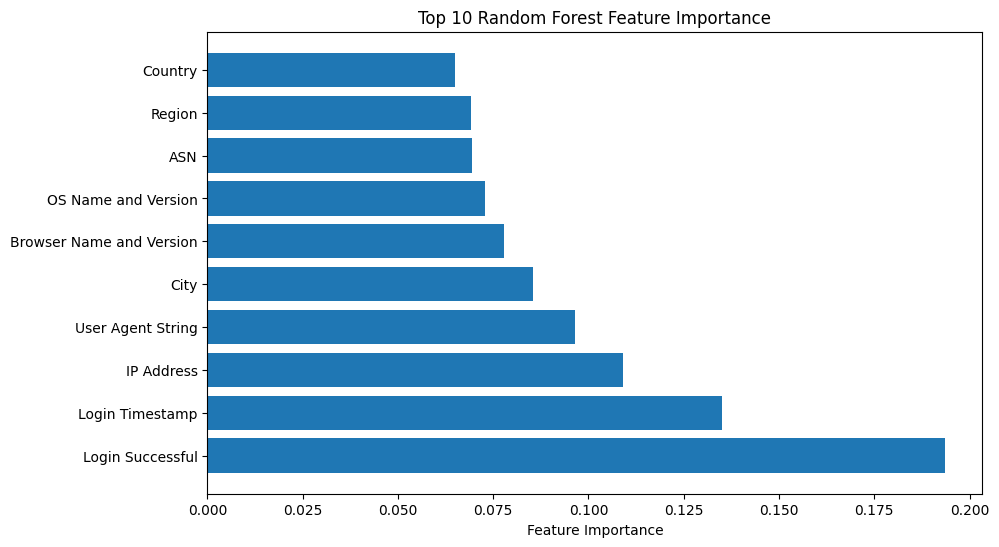

In [ ]:

# 특성 중요도 얻기
feature_importances = rf_model.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 중요한 특성만 선택
top_10_features = feature_importance_df.head(10)

# 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importance')
plt.show()

In [ ]:
X.describe()

In [ ]:
print(top_10_features)

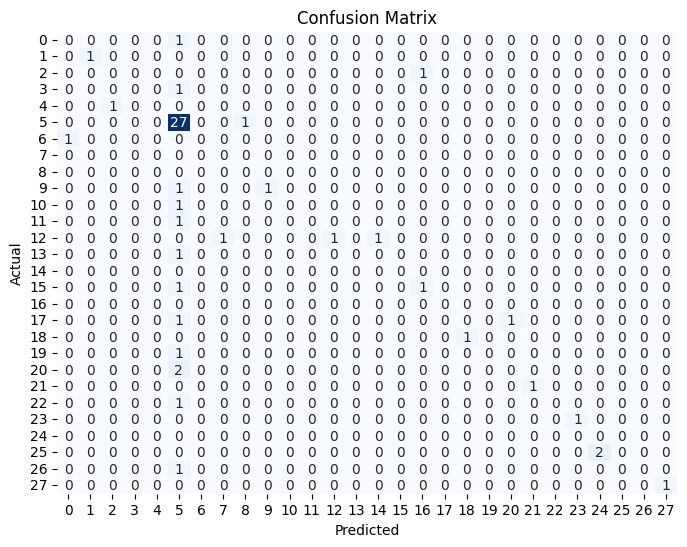

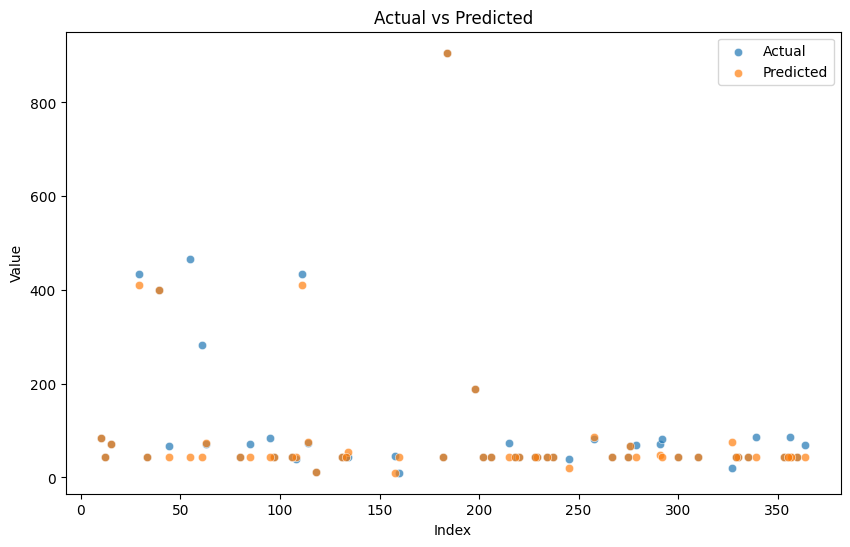

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
# 선택할 칼럼들 추출
selected_columns = merged_data[['Is Attack IP',  'Is Account Takeover', 'is_illegal']]
selected_columns

In [ ]:
# True를 1로, False를 0으로 변환하고 각 행별로 합계 계산
y = selected_columns.astype(int).sum(axis=1)

# 결과 출력
print(y)

In [ ]:
y.value_counts()

In [ ]:
merged_data.columns

In [ ]:
y = login_data_copy['User ID']

In [ ]:
# 선택할 칼럼들을 추출 (이 부분은 실제 데이터에 맞게 수정 필요)
merged_data['Round-Trip Time [ms]'] = merged_data['Round-Trip Time [ms]'].fillna(merged_data['Round-Trip Time [ms]'].mean())
 # 결측치를 평균값으로 대체


In [ ]:
X

로그인 데이터로만 훈련했을 때 Login_data_copy

2. mouse 데이터 합쳤을 때

In [ ]:
file_path2 = f'/content/drive/MyDrive/Colab Notebooks/mouse_data.xlsx'

mouse_data = pd.read_excel(file_path2)

In [ ]:
all_data = pd.concat([login_data, mouse_data], axis=1)

In [ ]:
login_data

In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
values_without_prefix = []

for index, row in top_1000_features.iterrows():
    prefix_found = False
    for val in row.values:
        for prefix in prefixes:
            if str(val).startswith(prefix):
                prefix_found = True
                break
        if not prefix_found:
            values_without_prefix.append(val)

print(values_without_prefix)


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_200_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_1000_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_count = {}

for prefix in prefixes:
    count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = count

    # 만약 prefix 뒤에 오는 모든 문구를 *로 포함하여 카운트하려면 아래와 같이 수정합니다.
    all_count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = all_count

print(prefix_count)


In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# PCA를 사용하여 데이터 차원 축소 (2차원으로 설정)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
merged_data['Cluster'] = kmeans.fit_predict(X_pca)

# 시각화
plt.figure(figsize=(10, 6))

# 산점도 그리기
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster', data=merged_data, palette='viridis', s=100)

# 중심점 표시
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()